In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import Model

In [2]:
with tf.name_scope('my'):
    v = tf.Variable(1)
print(v)
print(v.numpy())

<tf.Variable 'my/Variable:0' shape=() dtype=int32, numpy=1>
1


In [3]:
matrix1 = tf.constant([[3., 3., 3]])
matrix2 = tf.constant([[2.],[2.], [1]])

product = tf.matmul(matrix1, matrix2)
print("Multiplication with matrixes:", product)

print("broadcast matrix in Multiplication:", matrix1 * matrix2)

Multiplication with matrixes: tf.Tensor([[15.]], shape=(1, 1), dtype=float32)
broadcast matrix in Multiplication: tf.Tensor(
[[6. 6. 6.]
 [6. 6. 6.]
 [3. 3. 3.]], shape=(3, 3), dtype=float32)


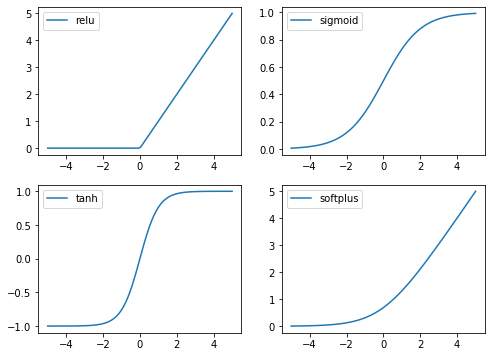

In [4]:
x = np.linspace(-5, 5, 100)
relu = tf.nn.relu(x)
sigmoid = tf.nn.sigmoid(x)
tanh = tf.nn.tanh(x)
softplus = tf.nn.softplus(x)
softmax = tf.nn.softmax(x)

plt.figure(1, figsize=(8,6))

plt.subplot(221)
plt.plot(x, relu, label = 'relu')
plt.legend()

plt.subplot(222)
plt.plot(x, sigmoid, label = 'sigmoid')
plt.legend()

plt.subplot(223)
plt.plot(x, tanh, label = 'tanh')
plt.legend()

plt.subplot(224)
plt.plot(x, softplus, label = 'softplus')
plt.legend()

In [5]:
def f(x, y):
    res = 1.0
    for i in range(y):
        if 1 < i < 5:
            res = tf.multiply(res, x)
    return res

def grad(x, y):
    with tf.GradientTape() as t:
        t.watch(x)
        out = f(x, y)
    return t.gradient(out, x)


x = tf.convert_to_tensor(2.0)
print(grad(x, 3).numpy())
print(grad(x, 6).numpy())

1.0
12.0


## Linear regression

=> epoch  1: w_true = 3.00 w_pred = 8.53 b_true = 2.00 b_pred = 4.41 loss = 61.04


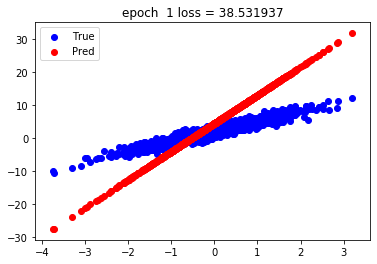

In [6]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(10.0)
        self.b = tf.Variable(5.0)
    
    def __call__(self, inputs):
        return self.W * inputs + self.b
    
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))

model = Model()

def plot(epoch):
    plt.scatter(inputs, outputs, c = 'b', label = 'True')
    plt.scatter(inputs, model(inputs), c = 'r', label = 'Pred')
    plt.title("epoch %2d loss = %s" %(epoch, str(compute_loss(outputs, model(inputs)).numpy())))
    plt.legend()
    plt.pause(1)
    plt.ion()
    plt.close()

true_W = 3.0
true_b = 2.0

NUM_EXAMPLES = 1000
inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

outputs = inputs * true_W + true_b + noise

learning_rate = 0.1
#for epoch in range(30):
for epoch in range(1):
    with tf.GradientTape() as tape:
        loss = compute_loss(outputs, model(inputs))
    dW, db = tape.gradient(loss, [model.W, model.b])
    
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)
    
    print("=> epoch %2d: w_true = %.2f w_pred = %.2f b_true = %.2f b_pred = %.2f loss = %.2f" %(epoch + 1,
                                                                                                true_W,
                                                                                                model.W.numpy(),
                                                                                                true_b,
                                                                                                model.b.numpy(),
                                                                                                loss.numpy()))
    plot(epoch + 1)

## Logistic regression

In [7]:
learning_rate = 0.001
training_epochs = 6
batch_size = 600

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

x_train = tf.cast(tf.reshape(x_train, [-1, 784]), tf.float32) / 255.0
x_test = tf.cast(tf.reshape(x_test, [-1, 784]), tf.float32) / 255.0

train_dataset = (tf.data.Dataset.from_tensor_slices((x_train, y_train))
                        .batch(batch_size)
                        .shuffle(1000))

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

model = lambda x: tf.nn.softmax(tf.matmul(x, W) + b)
compute_loss = lambda true, pred: tf.reduce_mean(tf.reduce_sum(tf.losses.binary_crossentropy(true, pred), axis = -1))
compute_accuracy = lambda true, pred: tf.reduce_mean(tf.keras.metrics.categorical_accuracy(true, pred))
optimizer = tf.optimizers.Adam(learning_rate)

for epoch in range(training_epochs):
    for i, (x_, y_) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            pred = model(x_)
            loss = compute_loss(y_, pred)
        acc = compute_accuracy(y_, pred)
        grads = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(grads, [W, b]))
        print("=> epoch %2d counter %2d loss %.2f acc %.2f" %(epoch, i, loss.numpy(), acc.numpy()))

=> epoch  0 counter  0 loss 195.05 acc 0.09
=> epoch  0 counter  1 loss 191.92 acc 0.57
=> epoch  0 counter  2 loss 188.78 acc 0.56
=> epoch  0 counter  3 loss 185.84 acc 0.58
=> epoch  0 counter  4 loss 181.96 acc 0.59
=> epoch  0 counter  5 loss 180.06 acc 0.60
=> epoch  0 counter  6 loss 175.98 acc 0.67
=> epoch  0 counter  7 loss 175.08 acc 0.69
=> epoch  0 counter  8 loss 171.07 acc 0.68
=> epoch  0 counter  9 loss 169.81 acc 0.68
=> epoch  0 counter 10 loss 162.26 acc 0.75
=> epoch  0 counter 11 loss 163.34 acc 0.70
=> epoch  0 counter 12 loss 161.19 acc 0.71
=> epoch  0 counter 13 loss 157.43 acc 0.77
=> epoch  0 counter 14 loss 154.63 acc 0.73
=> epoch  0 counter 15 loss 154.68 acc 0.75
=> epoch  0 counter 16 loss 152.75 acc 0.75
=> epoch  0 counter 17 loss 147.35 acc 0.73
=> epoch  0 counter 18 loss 143.81 acc 0.78
=> epoch  0 counter 19 loss 145.12 acc 0.71
=> epoch  0 counter 20 loss 144.55 acc 0.72
=> epoch  0 counter 21 loss 142.77 acc 0.75
=> epoch  0 counter 22 loss 141.

=> epoch  2 counter  0 loss 57.24 acc 0.84
=> epoch  2 counter  1 loss 46.80 acc 0.88
=> epoch  2 counter  2 loss 54.35 acc 0.86
=> epoch  2 counter  3 loss 49.14 acc 0.87
=> epoch  2 counter  4 loss 41.20 acc 0.90
=> epoch  2 counter  5 loss 43.12 acc 0.90
=> epoch  2 counter  6 loss 42.89 acc 0.92
=> epoch  2 counter  7 loss 46.69 acc 0.88
=> epoch  2 counter  8 loss 39.10 acc 0.90
=> epoch  2 counter  9 loss 57.84 acc 0.84
=> epoch  2 counter 10 loss 45.48 acc 0.88
=> epoch  2 counter 11 loss 44.40 acc 0.89
=> epoch  2 counter 12 loss 47.28 acc 0.87
=> epoch  2 counter 13 loss 41.81 acc 0.89
=> epoch  2 counter 14 loss 45.05 acc 0.89
=> epoch  2 counter 15 loss 38.49 acc 0.91
=> epoch  2 counter 16 loss 44.05 acc 0.89
=> epoch  2 counter 17 loss 36.90 acc 0.93
=> epoch  2 counter 18 loss 37.94 acc 0.93
=> epoch  2 counter 19 loss 54.41 acc 0.84
=> epoch  2 counter 20 loss 53.68 acc 0.86
=> epoch  2 counter 21 loss 46.19 acc 0.88
=> epoch  2 counter 22 loss 41.63 acc 0.90
=> epoch  2

=> epoch  4 counter  0 loss 45.47 acc 0.89
=> epoch  4 counter  1 loss 38.14 acc 0.91
=> epoch  4 counter  2 loss 27.74 acc 0.95
=> epoch  4 counter  3 loss 29.70 acc 0.92
=> epoch  4 counter  4 loss 35.59 acc 0.90
=> epoch  4 counter  5 loss 34.92 acc 0.91
=> epoch  4 counter  6 loss 35.28 acc 0.92
=> epoch  4 counter  7 loss 37.53 acc 0.92
=> epoch  4 counter  8 loss 49.42 acc 0.86
=> epoch  4 counter  9 loss 39.55 acc 0.88
=> epoch  4 counter 10 loss 39.19 acc 0.89
=> epoch  4 counter 11 loss 29.29 acc 0.94
=> epoch  4 counter 12 loss 36.36 acc 0.92
=> epoch  4 counter 13 loss 36.24 acc 0.91
=> epoch  4 counter 14 loss 44.43 acc 0.87
=> epoch  4 counter 15 loss 48.12 acc 0.87
=> epoch  4 counter 16 loss 37.21 acc 0.89
=> epoch  4 counter 17 loss 29.55 acc 0.93
=> epoch  4 counter 18 loss 33.09 acc 0.91
=> epoch  4 counter 19 loss 37.92 acc 0.91
=> epoch  4 counter 20 loss 38.03 acc 0.89
=> epoch  4 counter 21 loss 32.83 acc 0.92
=> epoch  4 counter 22 loss 33.39 acc 0.91
=> epoch  4

In [8]:
pred = model(x_test)
loss = compute_loss(y_test, pred)
acc = compute_accuracy(y_test, pred)
print("=> loss %.2f acc %.4f" %(loss.numpy(), acc.numpy()))

=> loss 543.79 acc 0.9123


## MLP

In [9]:
learning_rate = 0.001
batch_size = 600
training_steps = 2000
display_step = 200

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = tf.divide(tf.reshape(tf.cast(x_train, tf.float32), [-1, 28*28]), 255.0)
x_test = tf.divide(tf.reshape(tf.cast(x_test, tf.float32), [-1, 28*28]), 255.0)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

n_hidden_1 = 256
n_hidden_2 = 256
n_input = 28*28
n_classes = 10

Weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random.normal([n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_classes]))
}

In [10]:
def MLP(X):
    layer_1 = tf.nn.sigmoid(tf.matmul(X, Weights['h1']) + biases['h1'])
    layer_2 = tf.nn.sigmoid(tf.matmul(layer_1, Weights['h2']) + biases['h2'])
    return tf.nn.softmax(tf.matmul(layer_2, Weights['out']) + biases['out'])

def cross_entropy(true, pred):
    y_true = tf.one_hot(true, 10)
    y_pred = tf.clip_by_value(pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

def accuracy(true, pred):
    correct = tf.equal(tf.argmax(pred, 1), tf.cast(true, tf.int64))
    return tf.reduce_mean(tf.cast(correct, tf.float32), axis = -1)

optimizer = tf.optimizers.SGD(learning_rate)

In [11]:
def train_step(x, y):
    with tf.GradientTape() as tape:
        pred = MLP(x)
        loss = cross_entropy(y, pred)
    trainable_variables = list(Weights.values()) + list(biases.values())
    grads = tape.gradient(loss, trainable_variables) 
    optimizer.apply_gradients(zip(grads, trainable_variables))

for step, (_x, _y) in enumerate(train_data.take(training_steps), 1):
    train_step(_x, _y)
    
    if step%display_step == 0:
        pred = MLP(_x)
        loss = cross_entropy(_y, pred) 
        acc = accuracy(_y, pred)
        print("step: %4d loss: %2f acc %2f" %(step, loss, acc))

step:  200 loss: 264.403290 acc 0.866667
step:  400 loss: 188.571518 acc 0.906667
step:  600 loss: 143.620468 acc 0.923333
step:  800 loss: 118.862259 acc 0.948333
step: 1000 loss: 142.053925 acc 0.928333
step: 1200 loss: 141.900116 acc 0.930000
step: 1400 loss: 85.920029 acc 0.963333
step: 1600 loss: 81.491676 acc 0.961667
step: 1800 loss: 99.773453 acc 0.948333
step: 2000 loss: 81.997864 acc 0.956667


In [12]:
pred = MLP(x_test)
loss = cross_entropy(y_test, pred)
acc = accuracy(y_test, pred)
print("loss: %2f acc %2f" %(loss, acc))

loss: 3112.059570 acc 0.909900


## CNN

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.con1 = Conv2D(32, 3, activation = 'relu')
        self.flattern = Flatten()
        self.d1 = Dense(128, activation = 'relu')
        self.d2 = Dense(10)
        
    def call(self, x):
        x = self.con1(x)
        x = self.flattern(x)
        x = self.d1(x)
        return self.d2(x)

model = CNN()

In [3]:
loss_obj = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()


train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        pred = model(images)
        loss = loss_obj(labels, pred)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, pred)
    
@tf.function
def test_step(images, labels):
    pred = model(images)
    loss = loss_obj(labels, pred)
    test_loss(loss)
    test_accuracy(labels, pred)

In [4]:
EPOCHS = 3
tf.keras.backend.set_floatx('float64')

for epoch in range(EPOCHS):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
    for images, labels in train_ds:
        train_step(images, labels)
        
    for images, labels in test_ds:
        test_step(images, labels)
        
    template = "Epoch {:2d} Loss {:.3f} Accuracy {:.2f} (Test) Loss {:.3f} (Test) Accuracy {:.2f}"
    print(template.format(epoch + 1,
                          train_loss.result(),
                          train_accuracy.result() * 100,
                          test_loss.result(),
                          test_accuracy.result() * 100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch  1 Loss 0.135 Accuracy 95.93 (Test) Loss 0.063 (Test) Accuracy 97.89
Epoch  2 Loss 0.043 Accuracy 98.64 (Test) Loss 0.058 (Test) Accuracy 98.24
Epoch  3 Loss 0.021 Accuracy 99.36 (Test) Loss 0.061 (Test) Accuracy 98.17
